In [4]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://i.imgur.com/b4qvycU.jpg", width=700, height=80) 

### Importando os dados

In [5]:
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # plotagem de dados
import matplotlib.pyplot
import numpy as np # algebra linear
import os # acessar estrutura de diretórios
import pandas as pd # processamento de dados
import seaborn as sns
import csv
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Esse dataset possui a localização, datas, sequenciamentos e outras informações pertinentes as variantes da COVID-19. Apesar do tema dessa análise ser Omicrôn, vamos precisar dos dados de outras variantes para compararmos a evolução dessa mutação em cada país. A base de dados possui os registros mais recentes de novas variantes a fim de proporsionar uma análise mais atual do problema.



##### Descrição

###### location - este é o país para o qual as informações das variantes são fornecidas;
###### date - data para a entrada de dados;
###### variant - esta é a variante correspondente a esta entrada de dados;
###### num_sequences - o número de sequências processadas (para o país, variante e data);
###### perc_sequences - percentual de sequências do número total de sequências (para o país, variante e data);
###### num_sequences_total - número total de sequências (para o país, variante e data);

In [6]:
#df = pd.read_csv("covid-variants.csv")
#df.head(10)

valores_incorretos = ['-','NaN','na','--','.','n/a']
df = pd.read_csv("covid-variants.csv", delimiter=',',na_values=valores_incorretos)
df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


### Verificando nulos e incorretos

In [7]:
df.isnull().sum()

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64

### Definindo o tipo das colunas 

In [8]:
# Conforme observado abaixo, vemos que algumas colunas são tipo object.
# Para não haver conflitos na análise, vamos tipar essas colunas.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [9]:
colunas = ['location', 'date', 'variant']

# Mudando o tipo de dados das colunas por meio do laço For
for index, coluna in enumerate(colunas):
    if index < 1:
        df[f'{coluna}'] = df[f'{coluna}'].astype("string")
    elif index > 0 and index < 2:
        df[f'{coluna}'] = df[f'{coluna}'].values.astype("datetime64")
    else:
        df[f'{coluna}'] = df[f'{coluna}'].astype("string")

In [10]:
# Pronto. Colunas alteradas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   location             100416 non-null  string        
 1   date                 100416 non-null  datetime64[ns]
 2   variant              100416 non-null  string        
 3   num_sequences        100416 non-null  int64         
 4   perc_sequences       100416 non-null  float64       
 5   num_sequences_total  100416 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), string(2)
memory usage: 4.6 MB


### Quais são as variantes a serem analisadas?

In [11]:
df2 = df[['variant']].groupby(['variant']).sum()
df2

""
variant
Alpha
B.1.1.277
B.1.1.302
B.1.1.519
B.1.160
B.1.177
B.1.221
B.1.258
B.1.367


### Quais é o total de sequenciamentos de variantes por país?

In [48]:
dt1=df[['location','variant','perc_sequences','num_sequences']].groupby(['location']).sum()

#dt1.plot(kind='barh',order=dt1['num_sequences'][:10],figsize=(10,10))
df3 = dt1.sort_values('perc_sequences',ascending=False)

sns.barplot(x=df3.index,y='perc_sequences', data=df3,palette='OrRd_r',aggfunc=[np.max])

plt.xticks(rotation=60)
plt.tight_layout()
# plt.xlim(2,6) - limita o numero de dados que aparecem em X
# ,order=df3['location'][:4]

pandas.core.frame.DataFrame

In [190]:
#df3 = df.head(10).sort_values('perc_sequences',ascending=False)
df2 = df[['location']].groupby(['location']).sum()

df.filter(['location']).value_counts()

location      
Bangladesh        1080
Belgium           1080
United States     1080
United Kingdom    1080
France            1080
                  ... 
Montenegro         384
Monaco             360
Fiji               336
Benin              336
Brunei             240
Length: 121, dtype: int64

In [ ]:
sns.barplot(x='location',y='perc_sequences', data=df,palette='OrRd_r')
plt.xticks(rotation=60)
plt.tight_layout()

In [89]:
df.head(5)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


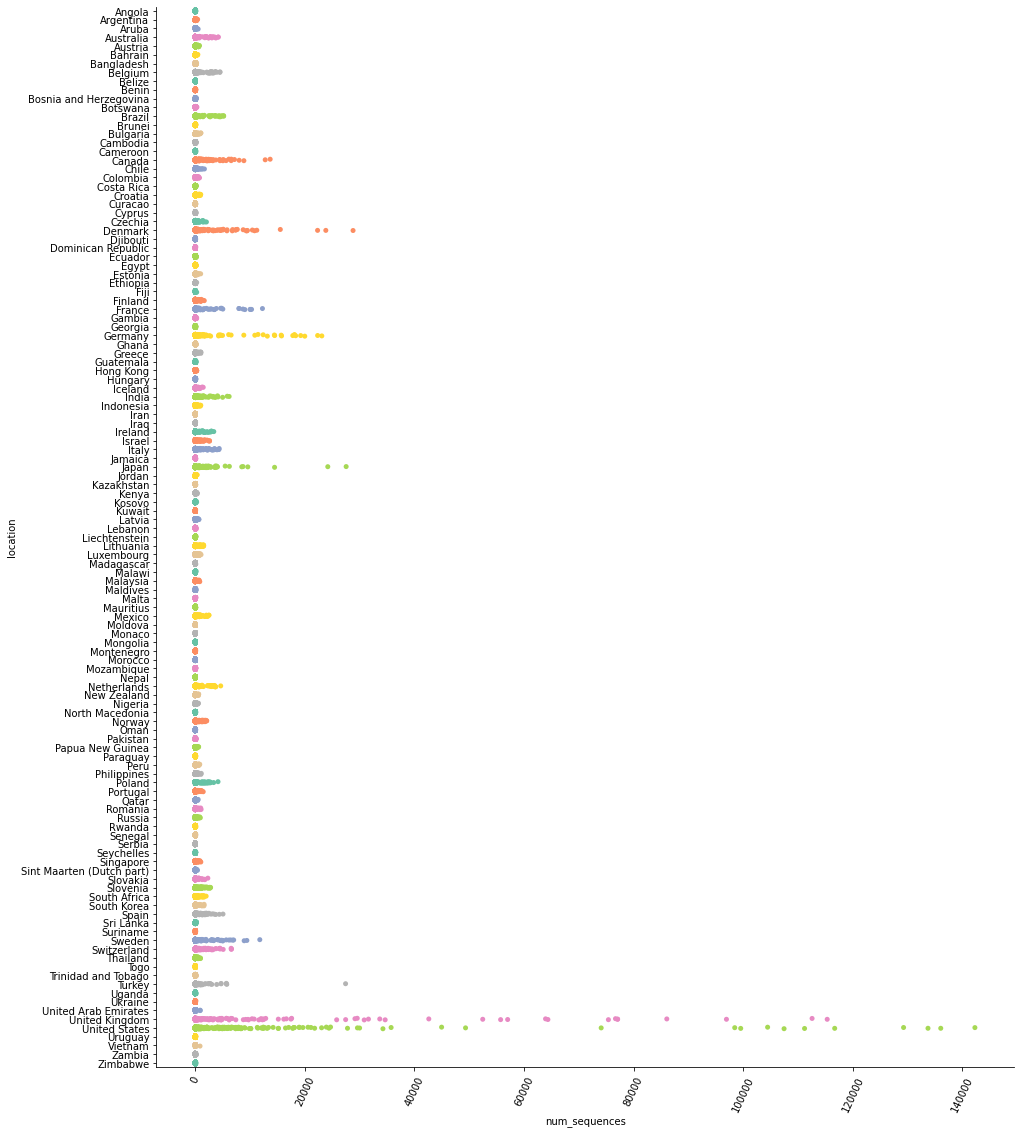

In [49]:
sns.catplot(x="num_sequences",y="location", palette="Set2", data=df,height=15.27, aspect=18.7/20.27);
df.sort_values(by='num_sequences', ascending=False)
plt.xticks(rotation=65)
plt.show()

In [51]:
df1 = gpd.read_file(
               gpd.datasets.get_path("covid_omicron_dataset"))
df1.head()
#df1.plot(color="lightgrey")

NameError: name 'gpd' is not defined

In [161]:
dt3=df[['location','num_sequences']].groupby(['location']).sum()
df3.sort_values('num_sequences',ascending=False).head(10)


,perc_sequences,num_sequences
location,,
United States,6738.15,2420758
United Kingdom,6232.85,1703122
Germany,6598.02,358070
Denmark,6547.48,335124
Canada,6761.20,226219
Japan,6848.17,215319
France,6571.21,164917
Sweden,6499.92,152958
Switzerland,6535.87,121486


In [157]:
#df[['location','num_sequences']].sort_values('num_sequences',ascending=False)
df.groupby(['num_sequences']).count().reset_index()


,num_sequences,location,date,variant,perc_sequences,num_sequences_total
0,0,84173,84173,84173,84173,84173
1,1,2753,2753,2753,2753,2753
2,2,1405,1405,1405,1405,1405
3,3,905,905,905,905,905
4,4,631,631,631,631,631
...,...,...,...,...,...,...
1558,116690,1,1,1,1,1
1559,129262,1,1,1,1,1
1560,133718,1,1,1,1,1
1561,136047,1,1,1,1,1
